In [2]:
from Linear_sys import linear_sys
import NonLinear_sys as nl_sys
import Poly_sys as pl_sys
from Plot import plot_results
import numpy as np
import sys
sys.path.append("D:\\Desktop\\thesis\\brsl\\scripts\\reachability")
from Zonotope import Zonotope

Reachability analysis for linear systems
Building model...


100%|██████████| 6/6 [00:00<00:00, 2004.77it/s]


Model built!

Propagating 1 initpoints 100 time...


100%|██████████| 1/1 [00:00<00:00, 27.20it/s]


Simulation done!

Computing Reachability...


100%|██████████| 6/6 [00:00<00:00, 49.31it/s]


Reachability took 0.14265871047973633 seconds.




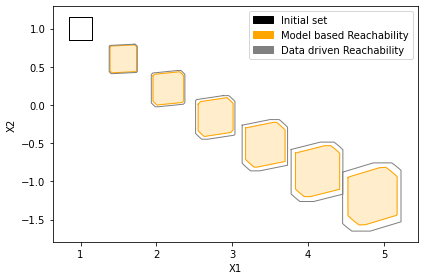

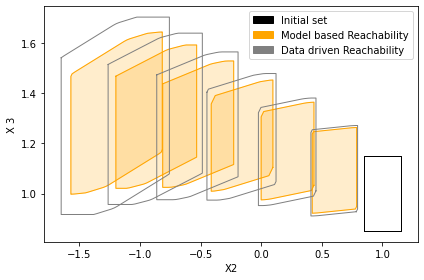

In [2]:
print("Reachability analysis for linear systems")
steps = 100
initpoints = 1
dim_x = 3
X0 = Zonotope(np.array(np.ones((dim_x, 1))), 0.15 *np.diag(np.ones((dim_x, 1)).T[0]))
U = Zonotope(10, 0.25)
W = Zonotope(np.array(np.zeros((dim_x, 1))), 0.005 * np.ones((dim_x, 1)))
A = np.array([[1, 0, 0], [1, 1, 0],[0, 1, 1]])
B_ss = np.array([1, -1, 0])
C = np.array([1, 0, 0])
D = 0
L_sys = linear_sys(A, B_ss, C, D, X0, U, W, dim_x, initpoints, steps, 0.05)
model, X_data = L_sys.Run_reachability(6, plot=True)

Reachability analysis for Lipschitz Nonlinear Systems
Propagating 1 initpoints 20 time...


100%|██████████| 1/1 [00:00<00:00, 77.11it/s]


Simulation done!

Computing reachability...


100%|██████████| 5/5 [00:00<00:00, 56.33it/s]

Reachability took 0.09175348281860352 seconds.




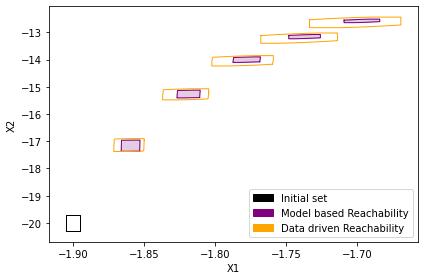

In [3]:
print("Reachability analysis for Lipschitz Nonlinear Systems")
dim_x = 2
U = Zonotope(np.array(np.array([0.01, 0.01]).reshape((2, 1))),np.diag([0.1, .2]))
R0 = Zonotope(np.array([-1.9, -20]).reshape((dim_x, 1)),np.diag([0.005, .3]))
dt = 0.015
initpoints = 1
steps = 20
wfac = 10**-4
nl_sys1 = nl_sys.NonLinear_sys(dt, U, R0, wfac, dim_x, initpoints, steps, nl_sys.cstrdiscr)
data = nl_sys1.Data_Driven_Reachability(5, True, plot=False)
model = nl_sys.load_model()
plot_results([model, data], True, "", ["Model based Reachability", "Data driven Reachability"], x0=R0)

Reachability analysis for Polynomial systems
Propagating 1 initpoints 7 time...


100%|██████████| 1/1 [00:00<00:00, 1002.46it/s]


Simulation done!

Computing Reachability...


100%|██████████| 3/3 [00:00<00:00, 334.59it/s]

Reachability took 0.014960527420043945 seconds.




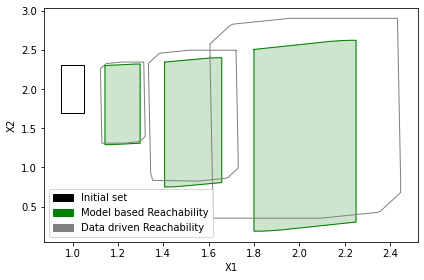

In [4]:
print("Reachability analysis for Polynomial systems")
np.random.seed(1)
N = 3
dt = 0.015
U = Zonotope(np.array(np.array([0.2, 0.3]).reshape((2, 1))),
             np.diag([0.01, .02]))
R0 = Zonotope(np.array([1, 2]).reshape((2, 1)),
              np.diag([0.05, .3]))
dim_x = 2
initpoints = 1
steps = 7
wfac = 0.000007
poly_sys = pl_sys.Poly_sys(dt, U, R0, wfac, dim_x,
                    initpoints, steps, pl_sys.poly_func)
data = poly_sys.Data_Driven_Reachability(N, False)
model = pl_sys.load_model(N)
plot_results([model, data], True, "", ["Model based Reachability", "Data driven Reachability"], x0=R0)